1099919 Christopher Tineo Reyes

# Asignación 3

In [428]:
# Importar dependencias

import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

1.   Utilizando el dataset de “house prices.csv” construir un modelo usando regresión lineal simple y múltiple.

In [429]:
df = read_csv('house-prices.csv', index_col='Home')
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
Home,,,,,,,
1,114300,1790,2,2,2,No,East
2,114200,2030,4,2,3,No,East
3,114800,1740,3,2,1,No,East
4,94700,1980,3,2,3,No,East
5,119800,2130,3,3,3,No,East


In [430]:
print(df.Price.min())
print(df.Price.max())

69100
211200


2. Para cada variable independiente realizar un diagrama de dispersión.

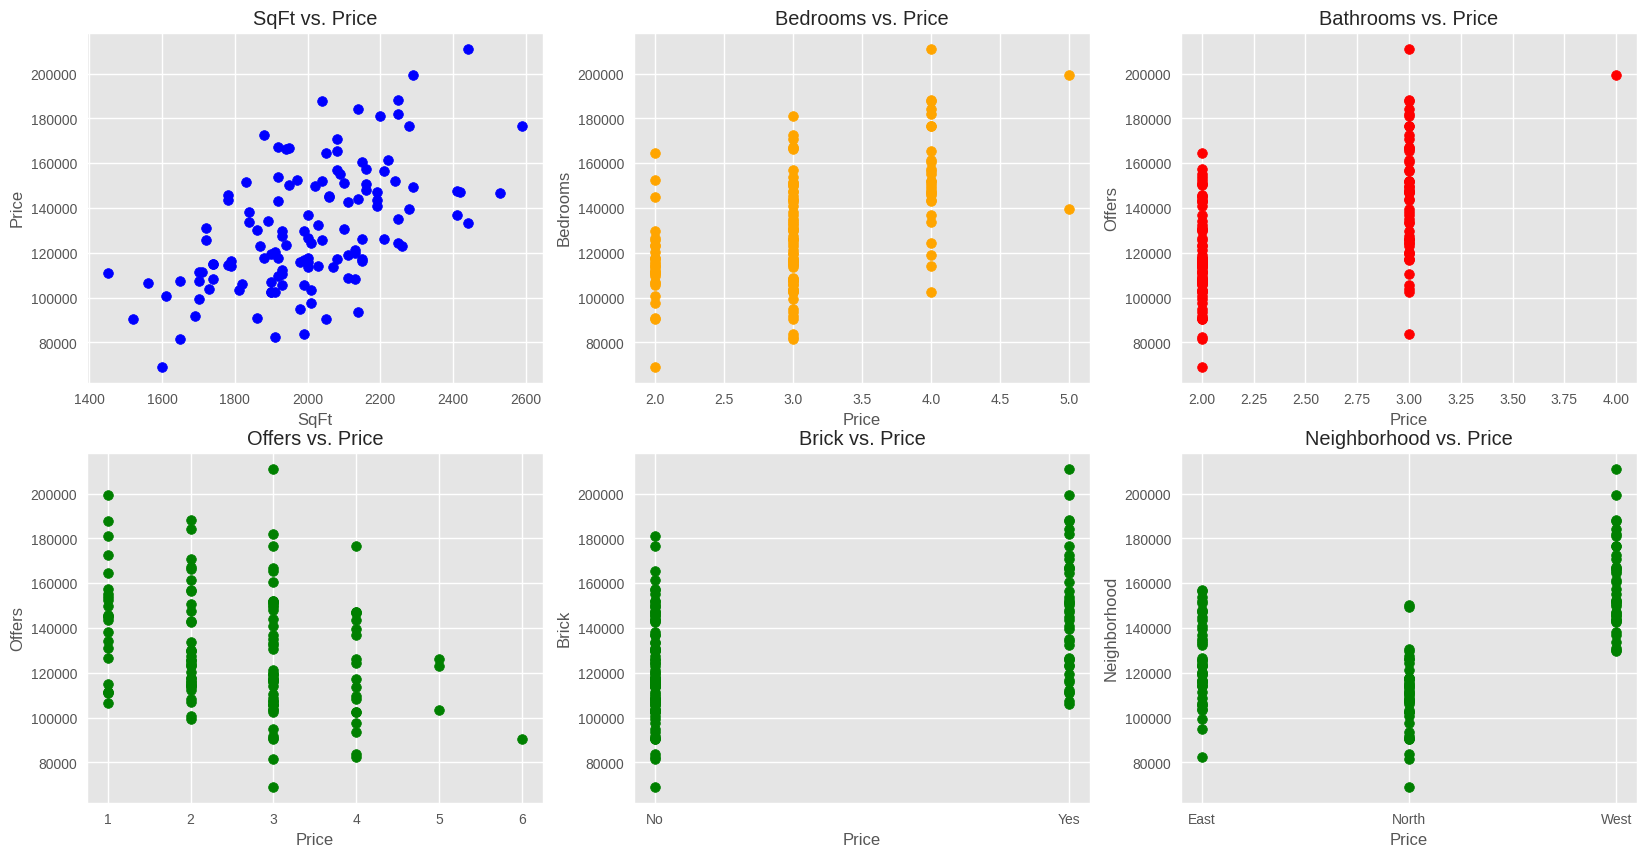

In [431]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

ax1 = axs[0, 0]
ax1.scatter(df['SqFt'], df['Price'], c="blue")
ax1.set_title('SqFt vs. Price')
ax1.set_xlabel('SqFt')
ax1.set_ylabel('Price')

ax2 = axs[0, 1]
ax2.scatter(df['Bedrooms'], df['Price'], c="orange")
ax2.set_title('Bedrooms vs. Price')
ax2.set_xlabel('Price')
ax2.set_ylabel('Bedrooms')

ax3 = axs[0, 2]
ax3.scatter(df['Bathrooms'], df['Price'], c="red")
ax3.set_title('Bathrooms vs. Price')
ax3.set_xlabel('Price')
ax3.set_ylabel('Offers')

ax4 = axs[1, 0]
ax4.scatter(df['Offers'], df['Price'], c="green")
ax4.set_title('Offers vs. Price')
ax4.set_xlabel('Price')
ax4.set_ylabel('Offers')

ax5 = axs[1, 1]
ax5.scatter(df['Brick'], df['Price'], c="green")
ax5.set_title('Brick vs. Price')
ax5.set_xlabel('Price')
ax5.set_ylabel('Brick')

ax6 = axs[1, 2]
ax6.scatter(df['Neighborhood'], df['Price'], c="green")
ax6.set_title('Neighborhood vs. Price')
ax6.set_xlabel('Price')
ax6.set_ylabel('Neighborhood')
# plt.tight_layout()
plt.show()

#### Continuación parte 1

### Modelo univariable

In [432]:
# creando un objeto de la clase LinearRegression
singleVariableModel = LinearRegression()

x = df.loc[:, ['SqFt']]

#separe el atributo de predicción en Y para el entrenamiento del modelo. 
y = df["Price"]

3. Dividir el dataset en 70% para entrenamiento y 30% para prueba.

Para el modelo univariable

In [433]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, shuffle=True)

# Ajustando los datos de entrenamiento.
singleVariableModel.fit(x_train, y_train)

LinearRegression()

In [443]:
# Realizar predicion.
y_pred = singleVariableModel.predict(x_test)


Para el modelo multivariable

In [435]:
X = df[['SqFt', 'Bedrooms', 'Bathrooms', 'Neighborhood']]

# Step 4: Convert categorical variables to numerical variables
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[['Neighborhood']])
X.drop('Neighborhood', axis=1, inplace=True)
X = np.concatenate((X, X_encoded), axis=1)

# Step 5: Split the dataset
X_mult_train, X_mult_test, y_mult_train, y_mult_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Create the model
multipleVariableModel = LinearRegression()

# Step 7: Train the model
multipleVariableModel.fit(X_mult_train, y_mult_train)


/home/chris/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/tmp/ipykernel_89809/3513133408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Neighborhood', axis=1, inplace=True)


LinearRegression()

In [442]:
# Step 8: Evaluate the model
y_mult_pred = multipleVariableModel.predict(X_mult_test)

4. Realizar la visualización de los resultados obtenidos por los modelos.

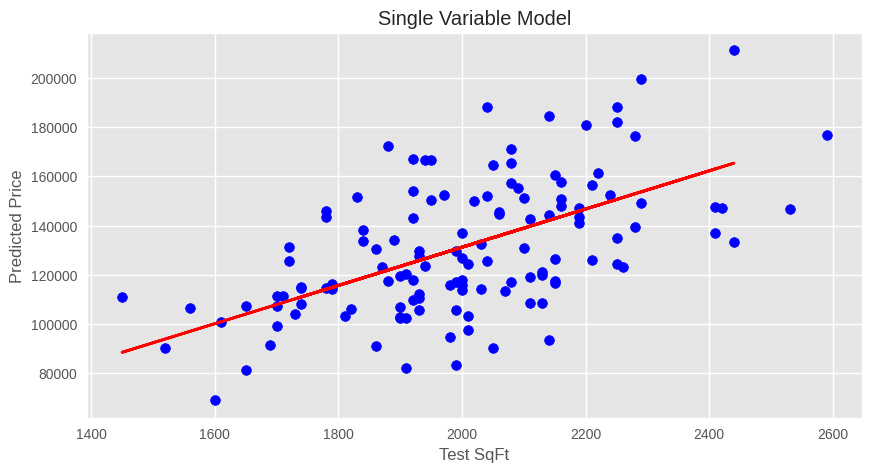

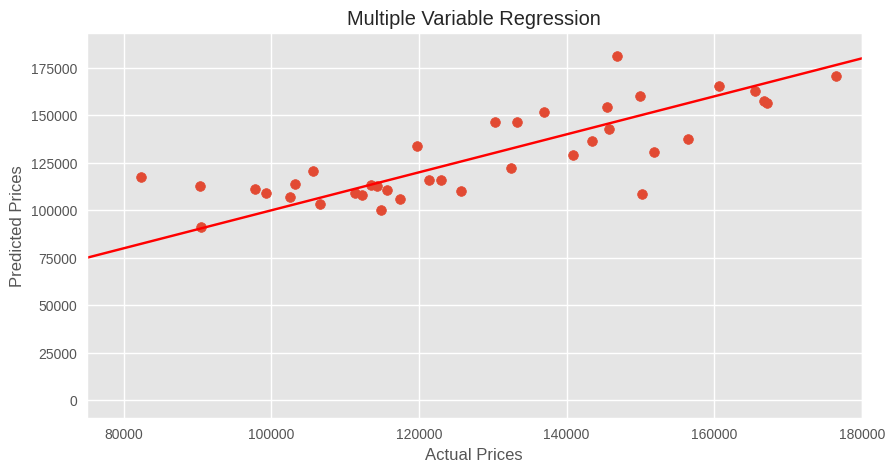

In [437]:
fig = plt.subplots(figsize=(10,5))
plt.scatter(df['SqFt'], df['Price'], c ="blue")
plt.plot(x_test, y_pred, color="red", linewidth=2)
# plt.xlim(0,300)
plt.title('Single Variable Model')
plt.xlabel('Test SqFt')
plt.ylabel('Predicted Price')
plt.show()

fig = plt.subplots(figsize=(10,5))
plt.scatter(y_mult_test, y_mult_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Multiple Variable Regression")

# Add a line plot of the form y = x
max_val = max(y_mult_test.max(), y_mult_pred.max())
plt.plot([0, max_val], [0, max_val], color='red')
plt.xlim(75000, 180000)

plt.show()

5. Evaluar los valores pronosticado con las métricas r cuadrado y r cuadrado ajustado.

In [447]:
# calculate the R-squared value
r2 = r2_score(y_test, y_pred)

# calculate the adjusted R-squared value
n = len(y_test)
k = x_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# mean absolute percentage error
# calculate the MAPE value
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Evaluar valores reales versus valores estimados.

print("Para el modelo univariable")

print("R2:", "{0:.4f}".format(r2_score(y_test, y_pred)),)
print('Adjusted R-squared:', adj_r2)
print('MAPE:', mape)

Para el modelo univariable
R2: 0.0832
Adjusted R-squared: 0.05843347383857134
MAPE: 15.596390421339096


In [449]:
# calculate the R-squared value
r2 = r2_score(y_mult_test, y_mult_pred)

# calculate the adjusted R-squared value
n = len(y_mult_test)
k = X_mult_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# mean absolute percentage error
# calculate the MAPE value
mape = np.mean(np.abs((y_mult_test - y_mult_pred) / y_mult_test)) * 100

# Evaluar valores reales versus valores estimados.

print("Para el modelo multivartiable")

print("R2:", "{0:.4f}".format(r2_score(y_mult_test, y_mult_pred)),)
print('Adjusted R-squared:', adj_r2)
print('MAPE:', mape)

Para el modelo multivartiable
R2: 0.6494
Adjusted R-squared: 0.5836093487053334
MAPE: 9.475554596138444


6. Compare los resultados de utilizar cada uno de los modelos.

| Metrica                               | Modelo univariable | Modelo multivariable |
|---------------------------------------|--------------------|----------------------|
| R2                                    | 0.0832             | 0.6494               |
| R Ajustado                            | 0.0584             | 0.5836               |
| MAPE (mean absolute percentage error) | 15.5963            | 9.4755               |

7. Entregar un reporte

Se evidencia una clara mejoría cuando añadimos más variables a nuestro modelo de predicciones.

La variable que menos relación parece tener es el área de la casa ya que esta parece tener más influencia con factores como la ubicación, cant. de baños y no. de habitaciones.

Es de suma importancia ser capaces de preprocesar nuestros datos para poder añadir a nuestras entradas valores no cuantitativos como son la ubicación (neighborhood) a nuestro dataset.